In [1]:
# -*- coding: utf-8 -*-

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import subprocess
from math import sqrt
from pylab import rcParams
import threading as thr

from IPython.display import Latex
import sympy as sm

In [79]:
# функция для сохраниения графиков

import os
def save(name='', fmt='png'):
    pwd = os.getcwd()
    os.chdir('./image' % fmt)
    plt.savefig('%s.%s' % (name, fmt), fmt='png')
    os.chdir(pwd)

Пользовательские библиотеки

In [80]:
import sde
import rungekutta as RK

In [81]:
# Настройка картинки matplotlib
plt.rcParams['figure.figsize'] = (15, 7)  # Изменение размера картинки
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 16
plt.rcParams['legend.framealpha'] = 0.5
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = 'Georgia'
#plt.rcParams.keys

# n-мерная модель Лотки-Вольтерры


\begin{equation}
    \frac{dx_i}{dt}=a_ix_i-\sum_{j=1,n}p_{ij}x_ix_j
\end{equation}

где

- $x_i$ — численность $i$-го вида;
- $p_{ij}$, $a_i$ — коэффициенты;


Задаем параметры

In [4]:
# Начальные значения
OO = (1.0, 1.0)
n=2

P = [['p_{0}{1}'.format(j,i) for i in range(0,n+1)] for j in range(1,n+1)]
P = sm.Matrix(P)

x = ['x_{0}'.format(i) for i in range(1,n+1)]
x = sm.Matrix(x)

#x = scipy.linspace(start, stop, num_elements)

Latex(sm.latex(P, mode='equation*'))
Latex(sm.latex(x, mode='equation*'))

<IPython.core.display.Latex object>

In [5]:
# Массив коффициентов

def p(n):
    return (sp.random.randint(0,100,(n,n+1))/100)

p(2)

array([[ 0.04,  0.01,  0.9 ],
       [ 0.69,  0.  ,  0.9 ]])

In [6]:
n=7
P=p(n)

OO=sp.random.random(n)



def A(x):
    A=[]
    AA=0
     
    for k in range(0,n):
        AA=0
        for l in range(1,n+1):
            #print(k,l)
            #print(P[k][l],x)#,x[l-1])
            AA=AA+P[k][l]*x[k]*x[l-1]
        A.append(P[k][0]*x[k]-AA)
    return( np.array(A))



def f(x):
    res = np.array(A)
    return res

def F(t, x, p):
    return A(x)

In [11]:
n=7

P_s = [['p_{0}{1}'.format(j,i) for i in range(0,n+1)] for j in range(1,n+1)]
P_s = sm.Matrix(P_s)


#P = ['{0}{1}'.format(sp.random.randint(n),sp.random.randint(n))] #for i in range(0,n+1)] for j in range(1,n+1)]
P=p(n)
P_sim = sm.Matrix(P)

x = ['x_{0}'.format(i) for i in range(1,n+1)]
x = sm.Matrix(x)

#print(P[0,0])

def A_sim(x,P,n):
    A=[]
    AA=0
     
    for k in range(0,n):
        AA=0
        for l in range(1,n+1):
            #print(k,l)
            #print(P[k][l],x)#,x[l-1])
            AA=AA+P[k,l]*x[k]*x[l-1]
        A.append(P[k,0]*x[k]-AA)
    return(A)


#x = scipy.linspace(start, stop, num_elements)


l=Latex(sm.latex(A_sim(x,P_sim,n), mode='equation'))
l
#print(Latex(sm.latex(A_sim(x,P,n)[0], mode='equation*')))

<IPython.core.display.Latex object>

In [88]:
#x=[1,1]
#n=2

#pp=p(2)
y=[]
rk = RK.RK(n)
t, y = rk.integrate(F, OO, (0.0, 10.0), h=0.01)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


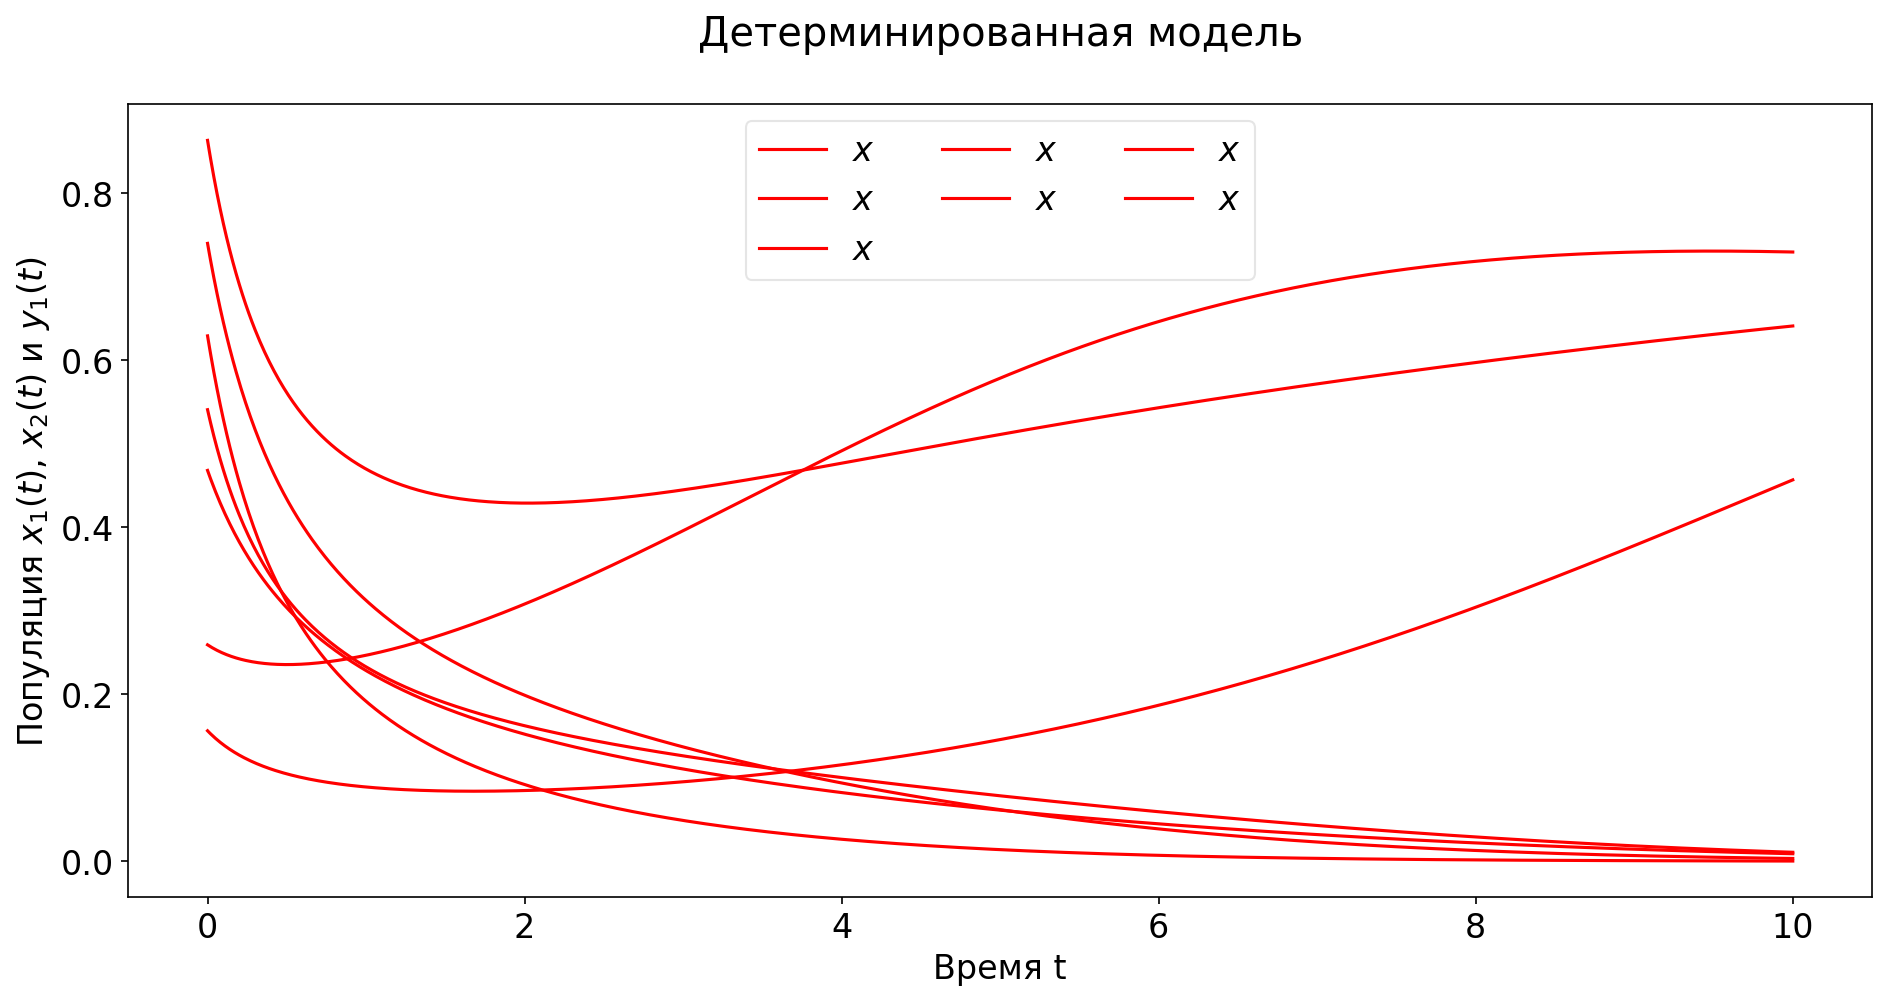

In [89]:
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1,1,1)

title = "Детерминированная модель\n"
#title += "($x_1$, $x_2$, $y_1$) = ({0[0]:3.1f},{0[1]:3.1f},{0[2]:3.1f}),\n"
#title += "($q$, $r$, $γ$,$β$) =  ({1:3.2f}, {2:3.2f}, {3:3.2f}, {4:3.2f})"
#title = title.format(OO, q, r, γ, β)

ax1.set_title(title)
ax1.set_xlabel("Время t")
ax1.set_ylabel("Популяция $x_1(t)$, $x_2(t)$ и $y_1(t)$")

for i in range(0,n):
    ax1.plot(t, y[i], 'r', label='$x$')
#ax1.plot(t, x[1], 'g', label='$x_2$')
#ax1.plot(t, x[2], 'b', label='$y_1$')

ax1.legend(ncol=3)

Способ быстро найти отрицательные элементы массива и обнулить их

In [6]:
a = np.array([-1, 2, 3])
a[a < 0] = 0
a

array([0, 2, 3])

In [7]:
def matrix_sqrt(M):
    U, s, V = np.linalg.svd(M, full_matrices=True)
    s[s < 0] = 0
    S = np.diag(s)
    return np.dot(U, np.dot(np.sqrt(S), V))

In [8]:
def f(x):
    res = np.array([
            x[0] - x[0]**2 - q*x[0]*x[2] + β*x[1] - γ*x[0],
            x[1] - x[1]**2 - β*x[1] + γ*x[0],
            x[2] - r*x[0]*x[2] - x[2]**2
        ])
    return res

def g(x):
    res = np.array([
            [x[0] + x[0]**2 + q*x[0]*x[2] + β*x[1] + γ*x[0], -β*x[1] - γ*x[0], 0.0], 
            [-β*x[1] - γ*x[0], x[1] + x[1]**2 + β*x[1] + γ*x[0], 0.0], 
            [0.0, 0.0, x[2] + r*x[0]*x[2] + x[2]**2]
        ])
    #res = sp.linalg.sqrtm(res)
    res = matrix_sqrt(res)
    return res

def F(t, x, p):
    return f(x)

### Детерминированная модель

In [9]:
rk = RK.RK(3)
t, x = rk.integrate(F, OO, (0.0, 100.0), h=0.01)

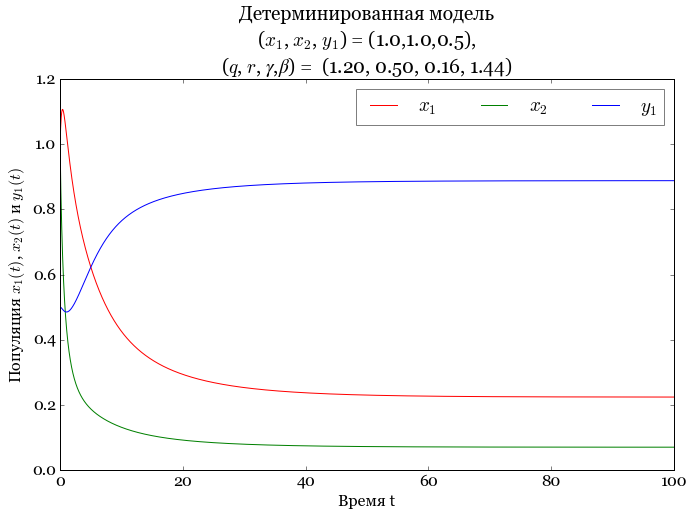

In [10]:
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1,1,1)

title = "Детерминированная модель\n"
title += "($x_1$, $x_2$, $y_1$) = ({0[0]:3.1f},{0[1]:3.1f},{0[2]:3.1f}),\n"
title += "($q$, $r$, $γ$,$β$) =  ({1:3.2f}, {2:3.2f}, {3:3.2f}, {4:3.2f})"
title = title.format(OO, q, r, γ, β)

ax1.set_title(title)
ax1.set_xlabel("Время t")
ax1.set_ylabel("Популяция $x_1(t)$, $x_2(t)$ и $y_1(t)$")

ax1.plot(t, x[0], 'r', label='$x_1$')
ax1.plot(t, x[1], 'g', label='$x_2$')
ax1.plot(t, x[2], 'b', label='$y_1$')

ax1.legend(ncol=3)

## Стационарные состояния. Фазовые портреты

In [11]:
x1 = Symbol("x1")
x2 = Symbol("x2")
y = Symbol("y")
s=solve([x1-x1*x1-q*x1*y+β*x2-γ*x1, x2-x2*x2-β*x2+γ*x1, y-r*x1*y-y*y], [x1, x2, y])

st =[]

if (0<r<1 and 0<q<1 and 0<beta<1 and γ>(β-1)*(q-1)) or (0<r<1 and 0<q<1 and β>1 and 0<γ<q*(β-1)*(1-r)) or (0<r<=1/q and q>=1 and β>1 and γ>(β-1)*(q-1) and (q-1)**2+(r-1)**2!=0):
    st.append(s[0])
    st.append(s[1])
    st.append(s[2])
    st.append(s[3])
    print("Стационарные точки (Условия (P)):", st)
elif (0<β<1 and γ>1-β) or (β>1,γ>0):
    st.append(s[0])
    st.append(s[1])
    st.append(s[2])
    print("Стационарные точки (Условия (С)):", st)
else:
    print(s)

Стационарные точки (Условия (P)): [(0.0, 0.0, 0.0), (0.0, 0.0, 1.00000000000000), (0.223340549181428, 0.0694428147153391, 0.888329725409286), (1.16614306688839, 0.262821977332350, 0.0)]


In [12]:
Time=5.0

X_1=st[0]
init_values_1 = [ (X_1[0] + delta, X_1[1] + delta, X_1[2] + delta) for delta in np.arange(0.0, 1.0, 0.1) ]
output_list_1 = [ ]
for xo in init_values_1:
   
    t, x = rk.integrate(F, (xo[0], xo[1], xo[2]),(0.0, Time), h=0.1)
    output_list_1.append(x)
    
X_2 = st[1]
init_values_2 = [ (X_2[0] + delta, X_2[1] + delta, X_2[2] + delta) for delta in np.arange(0.0, 1.0, 0.1) ]
output_list_2 = [ ]
for xo in init_values_2:
   
    t, x = rk.integrate(F, (xo[0], xo[1], xo[2]),(0.0, Time), h=0.1)
    output_list_2.append(x)

X_3 = st[2]
init_values_3 = [ (X_3[0] + delta, X_3[1] + delta, X_3[2] + delta) for delta in np.arange(0.0, 1.0, 0.1) ]
output_list_3 = [ ]
for xo in init_values_3:
   
    t, x = rk.integrate(F, (xo[0], xo[1], xo[2]),(0.0, Time), h=0.1)
    output_list_3.append(x)
    
#X_4 = st[3]
#init_values_4 = [ (X_4[0] + delta, X_4[1] + delta, X_4[2] + delta) for delta in np.arange(0.0, 1.0, 0.1) ]
#output_list_4 = [ ]
#for xo in init_values_4:
   
#    t, x = rk.integrate(F, (xo[0], xo[1], xo[2]),(0.0, 100.0), h=0.1)
#    output_list_4.append(x)

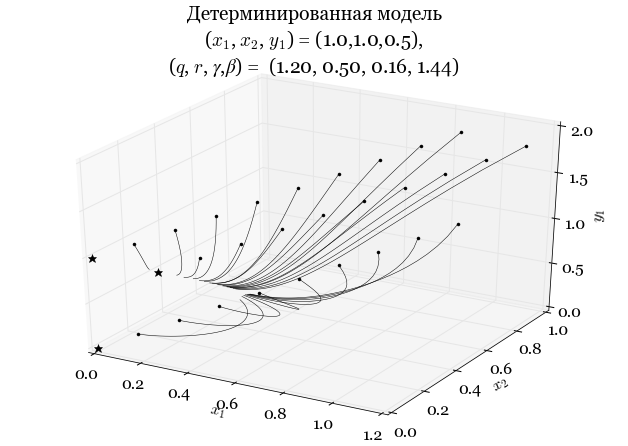

In [13]:
fig2 = plt.figure(2)
ax2 = fig2.gca(projection='3d')
ax2.set_title(title)

#title += "($A_2$, $A_3$) = (({sol2.x[0]}, {sol2.x[1]}, sol2.x[2]), ({0:3.1f},{1:3.1f},{2:3.1f})) "
#title = title.format((sol2.x[0], sol2.x[1], sol2.x[2]),(sol3.x[0], sol3.x[1], sol3.x[2]))

#ax1.set_title(title)

title = "Deterministic Model\n"
title += "($x_1$, $x_2$, $y_1$) = ({0:3.1f},{1:3.1f},{2:3.1f}), "
title += "(q,r,$\lambda$,$\gamma$) =  ({3:3.2f}, {4:3.2f}, {5:3.2f}, {6:3.2f}), \n"
title += "Stationary Point =  ({7:3.2f}, {8:3.2f}, {9:3.2f})"
title = title.format(OO[0],OO[1],OO[2],q,r,γ,β, X_3[0],X_3[1],X_3[2])

ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.set_zlabel("$y_1$")

for i in range(0,len(init_values_1),1):
    x1o = [init_values_1[i][0]]
    x2o = [init_values_1[i][1]]
    y1o = [init_values_1[i][2]]
    ax2.plot(x1o,x2o,y1o, marker = 'o', markersize=3.0, markerfacecolor='k')
    ax2.plot(output_list_1[i][0],output_list_1[i][1],output_list_1[i][2], color='k', lw=0.5)

for i in range(0,len(init_values_2),1):
    x1o = [init_values_2[i][0]]
    x2o = [init_values_2[i][1]]
    y1o = [init_values_2[i][2]]
    ax2.plot(x1o,x2o,y1o, marker = 'o', markersize=3.0, markerfacecolor='k')
    ax2.plot(output_list_2[i][0],output_list_2[i][1],output_list_2[i][2], color='k', lw=0.5)
    
for i in range(0,len(init_values_3),1):
    x1o = [init_values_3[i][0]]
    x2o = [init_values_3[i][1]]
    y1o = [init_values_3[i][2]]
    ax2.plot(x1o,x2o,y1o, marker = 'o', markersize=3.0, markerfacecolor='k')
    ax2.plot(output_list_3[i][0],output_list_3[i][1],output_list_3[i][2], color='k', lw=0.5)    
    
#for i in range(0,len(init_values_4),1):
#    x1o = [init_values_4[i][0]]
#    x2o = [init_values_4[i][1]]
#    y1o = [init_values_4[i][2]]
#    ax1.plot(x1o,x2o,y1o, marker = 'o', markersize=3.0, markerfacecolor='r')
#    ax1.plot(output_list_4[i][0],output_list_3[i][1],output_list_4[i][2], color='k', lw=0.5)
    
    
ax2.plot([X_3[0]],[X_3[1]],[X_3[2]], marker = '*', markersize=9.0, markerfacecolor='k') 
#ax1.plot([X_4[0]],[X_4[1]],[X_4[2]], marker = '*', markersize=9.0, markerfacecolor='g') 
ax2.plot([0.0],[0.0],[1.0], marker = '*', markersize=9.0, markerfacecolor='k') 
ax2.plot([0.0],[0.0],[0.0], marker = '*', markersize=9.0, markerfacecolor='k')



In [44]:
fig2.savefig("phase_1_1.png", format='png', dpi=300, bbox_inches='tight')

## Стохастическая модель

C:\Users\nasta\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\nasta\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\nasta\Anaconda3\lib\site-packages\ipykernel\__main__.py:33: ComplexWarning: Casting complex values to real discards the imaginary part


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


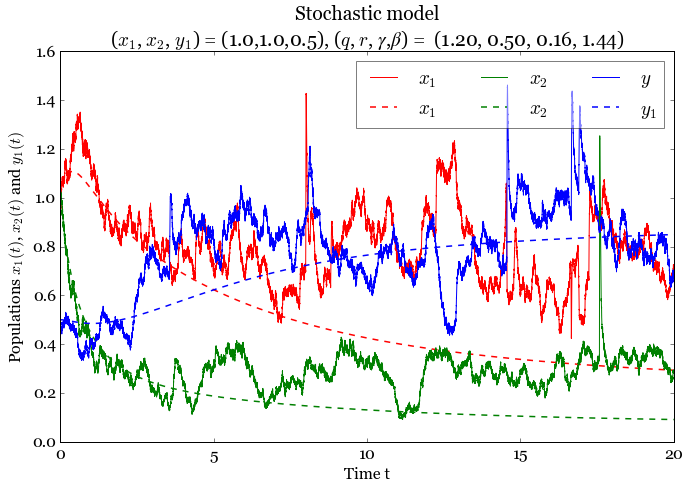

In [14]:
time_interval = (0.0, 20.0)
h = 0.0001
N = int((time_interval[1] - time_interval[0])/h)

sim_nums = np.arange(0,50,1)  

array_of_xss1 = np.empty((N,len(sim_nums)))
array_of_xss2 = np.empty((N,len(sim_nums)))
array_of_xss3 = np.empty((N,len(sim_nums)))

fig3 = plt.figure(3)
ax3 = fig3.add_subplot(1,1,1)

title = "Stochastic model\n"
title += "($x_1$, $x_2$, $y_1$) = ({0[0]:3.1f},{0[1]:3.1f},{0[2]:3.1f}), "
title += "($q$, $r$, $γ$,$β$) =  ({1:3.2f}, {2:3.2f}, {3:3.2f}, {4:3.2f})"
title = title.format(OO, q, r, γ, β)

ax3.set_title(title)
ax3.set_xlabel("Time t")
ax3.set_ylabel("Populations $x_1(t)$, $x_2(t)$ and $y_1(t)$")

# Решение СДУ

for sim_num in sim_nums:
    dt, t, dW, W = sde.wiener_process(N, 3, interval=time_interval)
    #y = sde.strongSRKp1Wm(f, g, h, OO, dW)
    y = sde.EulerMaruyamaWm(f, g, h, OO, dW)
    array_of_xss1[:, sim_num] = y.T[0]
    array_of_xss1[array_of_xss1 < 0] = 0.00000000000001
    array_of_xss2[:, sim_num] = y.T[1]
    array_of_xss2[array_of_xss2 < 0] = 0.00000000000001
    array_of_xss3[:, sim_num] = y.T[2]
    array_of_xss3[array_of_xss3 < 0] = 0.00000000000001
    print(1)
# Рисует все решения СДУ

#for sim_num in sim_nums:
#    ax2.plot(t, array_of_xss1[:, sim_num], color='#FFC0CB', lw=0.5)
#    ax2.plot(t, array_of_xss2[:, sim_num], color='#98FB98', lw=0.5)
#    ax2.plot(t, array_of_xss3[:, sim_num], color='#ADD8E6', lw=0.5)

# Рисует среднее решений СДУ     

Ex1 = array_of_xss1.mean(axis=-1)
Ex2 = array_of_xss2.mean(axis=-1)
Ex3 = array_of_xss3.mean(axis=-1)
                        
#ax2.plot(t, Ex1, color='r', label='$x_1$', lw = 1.0)
#ax2.plot(t, Ex2, color='g', label='$x_2$', lw = 1.0)
#ax2.plot(t, Ex3, color='b', label='$y$',   lw = 1.0)

# Решение ОДУ: решаем и рисуем

rk = RK.RK(3)
td, x = rk.integrate(F, OO, time_interval=time_interval, h=h)

ax3.plot(t, Ex1, color='r', label='$x_1$', lw = 1.0)
ax3.plot(td, x[0], 'r--', label='$x_1$', lw = 1.5)

ax3.plot(t, Ex2, color='g', label='$x_2$', lw = 1.0)
ax3.plot(td, x[1], 'g--', label='$x_2$', lw = 1.5)

ax3.plot(t, Ex3, color='b', label='$y$',   lw = 1.0)
ax3.plot(td, x[2], 'b--', label='$y_1$', lw = 1.5)

ax3.legend(ncol=3)

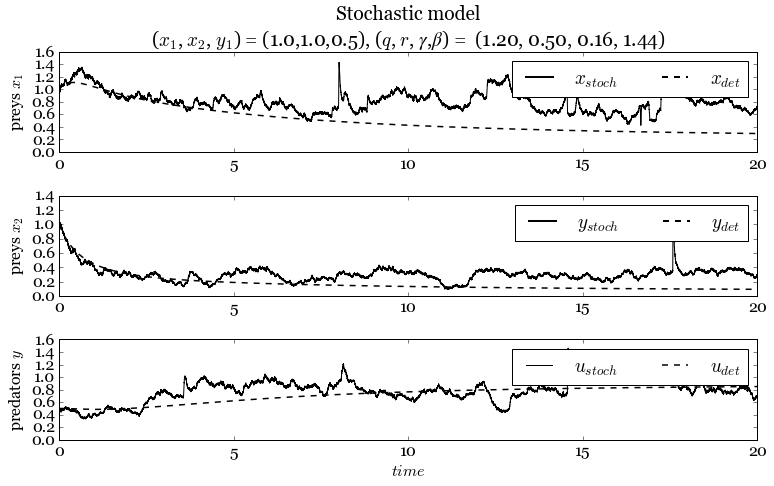

In [15]:
fig4 = plt.figure(4)
ax4 = [fig4.add_subplot(3,1,1), fig4.add_subplot(3,1,2), fig4.add_subplot(3,1,3)]

title = "Stochastic model\n"
title += "($x_1$, $x_2$, $y_1$) = ({0[0]:3.1f},{0[1]:3.1f},{0[2]:3.1f}), "
title += "($q$, $r$, $γ$,$β$) =  ({1:3.2f}, {2:3.2f}, {3:3.2f}, {4:3.2f})"
title = title.format(OO, q, r, γ, β)

ax4[0].set_title(title)

ax4[2].set_xlabel("$time$")
ax4[0].set_ylabel(r"preys $x_1$")
ax4[2].set_ylabel(r"predators $y$")
ax4[1].set_ylabel(r"preys $x_2$")

#ax3[0].xaxis.set_visible(False)

ax4[0].plot(t, Ex1, color='k', label='$x_{stoch}$', lw = 1.0)
ax4[0].plot(td, x[0], 'k--', label='$x_{det}$', lw = 1.5)
ax4[1].plot(t, Ex2, color='k', label='$y_{stoch}$', lw = 1.0)
ax4[1].plot(td, x[1], 'k--', label='$y_{det}$', lw = 1.5)
ax4[2].plot(t, Ex3, color='k', label='$u_{stoch}$', lw = 1.0)
ax4[2].plot(td, x[2], 'k--', label='$u_{det}$', lw = 1.5)

ax4[0].set_ylim(bottom=0)
ax4[1].set_ylim(bottom=0)
ax4[2].set_ylim(bottom=0)

ax4[0].legend(ncol=4, loc='upper right', framealpha=1.0)
for line in ax4[0].get_legend().get_lines():
    line.set_linewidth(2.0)
    
ax4[1].legend(ncol=4, loc='upper right', framealpha=1.0)
for line in ax4[1].get_legend().get_lines():
    line.set_linewidth(2.0)
    
ax4[2].legend(ncol=4, loc='upper right', framealpha=1.0)
for line in ax4[1].get_legend().get_lines():
    line.set_linewidth(2.0)
fig4.tight_layout()

In [16]:
fig4.savefig("stoch_1_2.png", format='png', dpi=300, bbox_inches='tight')

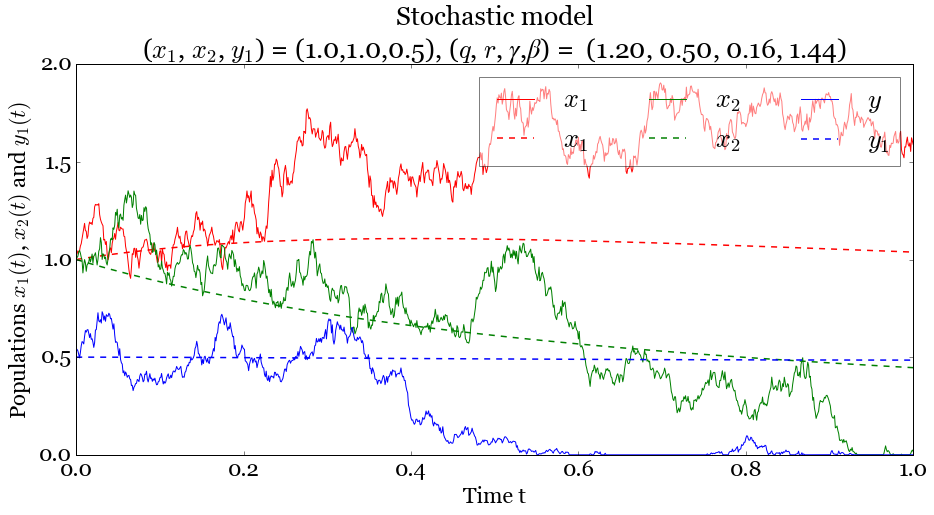

In [37]:
fig4 = plt.figure(4)
ax4 = fig4.add_subplot(1,1,1)

title = "Stochastic model\n"
title += "($x_1$, $x_2$, $y_1$) = ({0[0]:3.1f},{0[1]:3.1f},{0[2]:3.1f}), "
title += "($q$, $r$, $γ$,$β$) =  ({1:3.2f}, {2:3.2f}, {3:3.2f}, {4:3.2f})"
title = title.format(OO, q, r, γ, β)

ax4.set_title(title)
ax4.set_xlabel("Time t")
ax4.set_ylabel("Populations $x_1(t)$, $x_2(t)$ and $y_1(t)$")

ax4.plot(t, Ex1, color='r', label='$x_1$', lw = 1.0)
ax4.plot(td, x[0], 'r--', label='$x_1$', lw = 1.5)

ax4.plot(t, Ex2, color='g', label='$x_2$', lw = 1.0)
ax4.plot(td, x[1], 'g--', label='$x_2$', lw = 1.5)

ax4.plot(t, Ex3, color='b', label='$y$',   lw = 1.0)
ax4.plot(td, x[2], 'b--', label='$y_1$', lw = 1.5)

ax4.legend(ncol=3)

In [ ]:
fig4 = plt.figure(3)
ax4 = fig4.add_subplot(1,1,1)

title = "Стохастическая модель\n"
title += "($x_1$, $x_2$, $y_1$) = ({0[0]:3.1f},{0[1]:3.1f},{0[2]:3.1f}),\n"
title += "($q$, $r$, $γ$,$β$) =  ({1:3.2f}, {2:3.2f}, {3:3.2f}, {4:3.2f})"
title = title.format(OO, q, r, γ, β)

ax4.set_title(title)
ax4.set_xlabel("Время t")
ax4.set_ylabel("Популяция $x_1(t)$, $x_2(t)$ и $y_1(t)$")

for sim_num in sim_nums:
    ax4.plot(t, array_of_xss1[:, sim_num], color='#FFC0CB', lw=0.5)
    ax4.plot(t, array_of_xss2[:, sim_num], color='#98FB98', lw=0.5)
    ax4.plot(t, array_of_xss3[:, sim_num], color='#ADD8E6', lw=0.5)
    

Ex1 = array_of_xss1.mean(axis=-1)
Ex2 = array_of_xss2.mean(axis=-1)
Ex3 = array_of_xss3.mean(axis=-1)
                        
ax3.plot(t, Ex1, color='r', label='$x_1$', lw = 1.0)
ax3.plot(t, Ex2, color='g', label='$x_2$', lw = 1.0)
ax3.plot(t, Ex3, color='b', label='$y$',   lw = 1.0)

# Решение ОДУ: решаем и рисуем

rk = RK.RK(3)
dt, x = rk.integrate(F, OO, time_interval=time_interval, h=h)

ax2.plot(t, x[0], 'r--', label='$x_1$')
ax2.plot(t, x[1], 'g--', label='$x_2$')
ax2.plot(t, x[2], 'b--', label='$y_1$')

ax2.legend(ncol=3)

In [ ]:
time_interval = (0.0, 3.0)
h = 0.001
N = int((time_interval[1] - time_interval[0])/h)

#OO = (10.5, 20.5, 10.5)
sim_nums = np.arange(0,5,1)  

array_of_xss1 = np.empty((N,len(sim_nums)))
array_of_xss2 = np.empty((N,len(sim_nums)))
array_of_xss3 = np.empty((N,len(sim_nums)))

fig3 = plt.figure(3)
ax3 = fig3.add_subplot(1,1,1)

title = "Стохастическая модель\n"
title += "($x_1$, $x_2$, $y_1$) = ({0[0]:3.1f},{0[1]:3.1f},{0[2]:3.1f}),\n"
title += "($q$, $r$, $γ$,$β$) =  ({1:3.2f}, {2:3.2f}, {3:3.2f}, {4:3.2f})"
title = title.format(OO, q, r, γ, β)

ax3.set_title(title)
ax3.set_xlabel("Время t")
ax3.set_ylabel("Популяция $x_1(t)$, $x_2(t)$ и $y_1(t)$")

# Решение СДУ

dt, t, dW, W = sde.wiener_process(N, 3, interval=time_interval)
#y = sde.weakSRKp2Wm(f, g, h, OO, dW)
y = sde.EulerMaruyamaWm(f, g, h, OO, dW)
array_of_xss1[:, sim_num] = y.T[0]
array_of_xss1[array_of_xss1 < 0] = 0.00001
array_of_xss2[:, sim_num] = y.T[1]
array_of_xss2[array_of_xss2 < 0] = 0.00001
array_of_xss3[:, sim_num] = y.T[2]
array_of_xss3[array_of_xss3 < 0] = 0.00001
    
                        
ax3.plot(t, y.T[0], color='r', label='$x_1$', lw = 1.0)
ax3.plot(t, y.T[1], color='g', label='$x_2$', lw = 1.0)
ax3.plot(t, y.T[2], color='b', label='$y$',   lw = 1.0)

# Решение ОДУ: решаем и рисуем

rk = RK.RK(3)
t, x = rk.integrate(F, OO, time_interval=time_interval, h=h)

ax3.plot(t, x[0], 'r--', label='$x_1$')
ax3.plot(t, x[1], 'g--', label='$x_2$')
ax3.plot(t, x[2], 'b--', label='$y_1$')

ax3.legend(ncol=3)